In [1]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 

In [2]:
# Data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.uniform(size=len(x)) - 0.2

In [3]:
# Create a color if the group is "B"
my_color=np.where(y>=0, 'orange', 'skyblue')


Text(0,0.5,'Group')

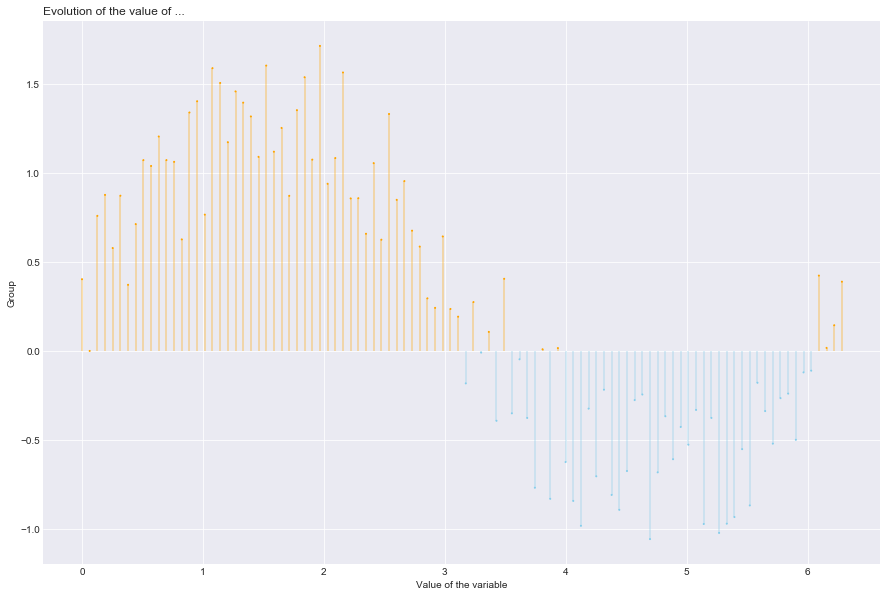

In [7]:
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns

sns.set_style('darkgrid')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10)


plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.4)
plt.scatter(x, y, color=my_color, s=1, alpha=1)
 
# Add title and axis names
plt.title("Evolution of the value of ...", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')


#could use for ratings(positive vs negative changes), newly incorporated vs insolvencies

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


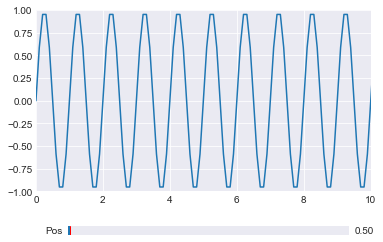

In [11]:
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
l, = plt.plot(t,s)
plt.axis([0, 10, -1, 1])

axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.2, 0.1, 0.65, 0.03])

spos = Slider(axpos, 'Pos', 0.1, 90.0)

def update(val):
    pos = spos.val
    ax.axis([pos,pos+10,-1,1])
    fig.canvas.draw_idle()

spos.on_changed(update)

plt.show()


In [12]:
from numpy import arange, sin, pi, float, size

import matplotlib
matplotlib.use('WXAgg')
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg
from matplotlib.figure import Figure

import wx

class MyFrame(wx.Frame):
    def __init__(self, parent, id):
        wx.Frame.__init__(self,parent, id, 'scrollable plot',
                style=wx.DEFAULT_FRAME_STYLE ^ wx.RESIZE_BORDER,
                size=(800, 400))
        self.panel = wx.Panel(self, -1)

        self.fig = Figure((5, 4), 75)
        self.canvas = FigureCanvasWxAgg(self.panel, -1, self.fig)
        self.scroll_range = 400
        self.canvas.SetScrollbar(wx.HORIZONTAL, 0, 5,
                                 self.scroll_range)

        sizer = wx.BoxSizer(wx.VERTICAL)
        sizer.Add(self.canvas, -1, wx.EXPAND)

        self.panel.SetSizer(sizer)
        self.panel.Fit()

        self.init_data()
        self.init_plot()

        self.canvas.Bind(wx.EVT_SCROLLWIN, self.OnScrollEvt)

    def init_data(self):

        # Generate some data to plot:
        self.dt = 0.01
        self.t = arange(0,5,self.dt)
        self.x = sin(2*pi*self.t)

        # Extents of data sequence: 
        self.i_min = 0
        self.i_max = len(self.t)

        # Size of plot window:       
        self.i_window = 100

        # Indices of data interval to be plotted:
        self.i_start = 0
        self.i_end = self.i_start + self.i_window

    def init_plot(self):
        self.axes = self.fig.add_subplot(111)
        self.plot_data = \
                  self.axes.plot(self.t[self.i_start:self.i_end],
                                 self.x[self.i_start:self.i_end])[0]

    def draw_plot(self):

        # Update data in plot:
        self.plot_data.set_xdata(self.t[self.i_start:self.i_end])
        self.plot_data.set_ydata(self.x[self.i_start:self.i_end])

        # Adjust plot limits:
        self.axes.set_xlim((min(self.t[self.i_start:self.i_end]),
                           max(self.t[self.i_start:self.i_end])))
        self.axes.set_ylim((min(self.x[self.i_start:self.i_end]),
                            max(self.x[self.i_start:self.i_end])))

        # Redraw:                  
        self.canvas.draw()

    def OnScrollEvt(self, event):

     # Update the indices of the plot:
        self.i_start = self.i_min + event.GetPosition()
        self.i_end = self.i_min + self.i_window + event.GetPosition()
        self.draw_plot()

class MyApp(wx.App):
    def OnInit(self):
        self.frame = MyFrame(parent=None,id=-1)
        self.frame.Show()
        self.SetTopWindow(self.frame)
        return True

if __name__ == '__main__':
    app = MyApp()
    app.MainLoop()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in l

ImportError: No module named 'wx'

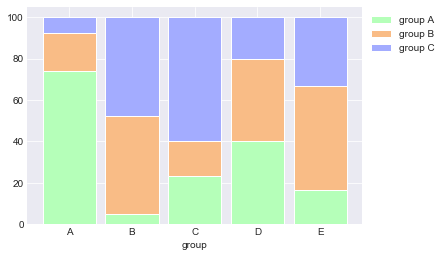

In [15]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label="group C")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()


Text(0,0.5,'Score')

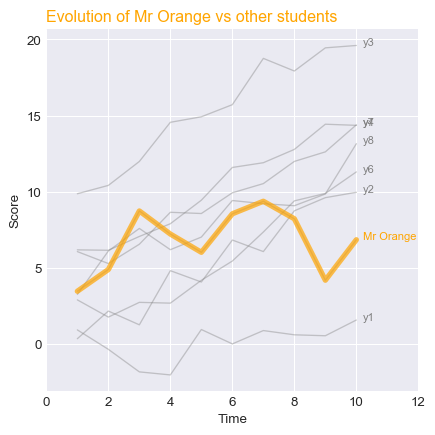

In [14]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
 
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
   num+=1
   name=list(df)[num]
   if name != 'y5':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


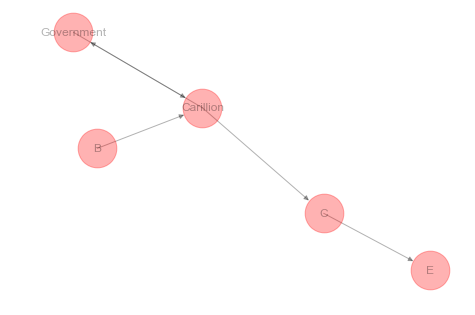

In [28]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['Government', 'Carillion', 'B', 'C','Carillion'], 'to':['Carillion', 'Government', 'Carillion', 'E','C']})
df
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
 



Text(0.5,1,'UN-Directed')

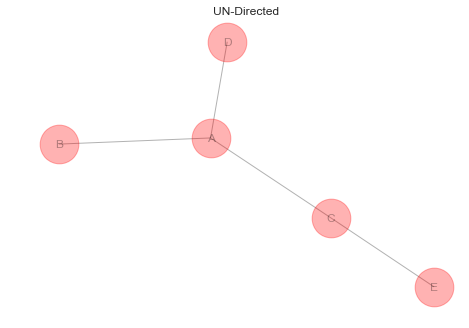

In [26]:
# ------- UNDIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['D', 'A', 'B', 'C','A'], 'to':['A', 'D', 'A', 'E','C']})
df
 
# Build your graph. Note that we use the Graph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )

nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)


# Make the graphnx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)
plt.title("UN-Directed")